In [1]:
import numpy as np
import matplotlib.pyplot as plt

In problem (b) and (c), we are tyo do the autoregressive process, with the recursion
$$X_i = \theta X_{i-1} + \epsilon_{i} := f(X_{i-1})$$

## (b)

In [2]:
# parameters setting
mu = 0
X_0 = 0
sigma = 1
theta = 0.5
n = 100

In [3]:
def f(x):
    epsilon = np.random.normal(loc=mu, scale=sigma)
    return theta * x + epsilon

In [4]:
def Xs(n, X_0=0):
    output = np.zeros(n+1)
    output[0] = X_0
    for i in range(1, n+1):
        output[i] = f(output[i-1])
    return output

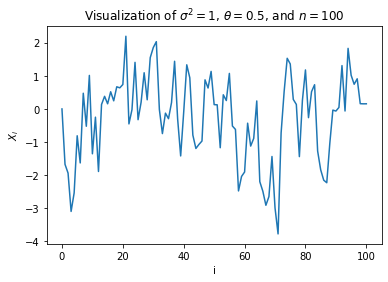

In [5]:
X_500 = Xs(n=100)
plt.plot(X_500)
plt.title(r"Visualization of $\sigma^{2} = 1$, $\theta = 0.5$, and $n=100$")
plt.ylabel(r"$X_{i}$")
plt.xlabel(r"i")

plt.show()

## (c)

In [6]:
def theta_n(X):
    n = len(X) - 1 
    denominator = sum([X[i-1]**2 for i in range(1, n+1)])
    numerator = sum([X[i]*X[i-1] for i in range(1, n+1)])

    return numerator / denominator
    

In [7]:
def theta_n_hist(k, N=500):
    hist = np.zeros(N)
    for i in range(N):
        output = Xs(n=k)
        hist[i] = theta_n(output)
    
    return hist

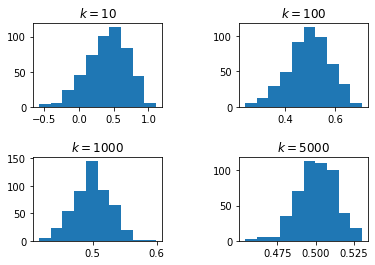

In [8]:
fig, axs = plt.subplots(2, 2)
ks = [10, 100, 1000, 5000]
plt.subplots_adjust(wspace=0.6, hspace=0.6)
for i in range(4):
    hist = theta_n_hist(k=ks[i])
    axs[i//2][i%2].hist(hist)
    axs[i//2, i%2].set_title(r"$k = {}$".format(ks[i]))

As $k$ becomes larger, the histogram of $\hat{\theta_{k}}$ is more close to a normal distribution.